Import libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

Import data

In [2]:
Data=pd.read_csv('datasets_14872_228180_Admission_Predict.csv')

In [3]:
Data.head

<bound method NDFrame.head of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance

In [4]:
Data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
Data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Explore PDFs

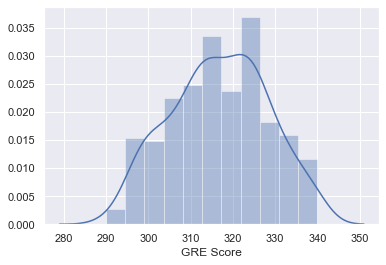

In [9]:
sns.distplot(Data['GRE Score'])

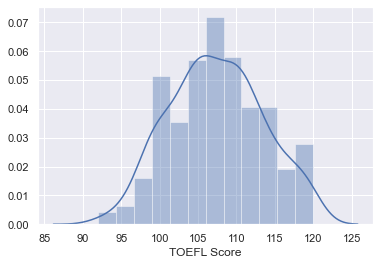

In [7]:
sns.distplot(Data['TOEFL Score'])

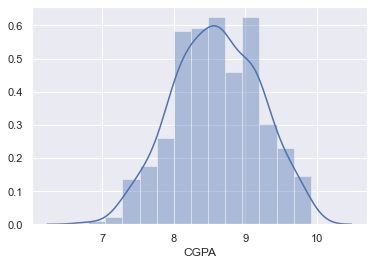

In [5]:
sns.distplot(Data['CGPA'])

#Create scatter plots for 3 selected features
#visualize relationships between the dependent and independent variables

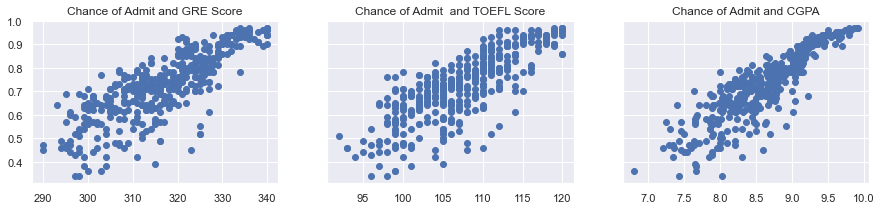

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(Data['GRE Score'],Data['Chance of Admit '])
ax1.set_title('Chance of Admit and GRE Score')
ax2.scatter(Data['TOEFL Score'],Data['Chance of Admit '])
ax2.set_title('Chance of Admit  and TOEFL Score')
ax3.scatter(Data['CGPA'],Data['Chance of Admit '])
ax3.set_title('Chance of Admit and CGPA')


plt.show()

In [7]:
Data.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

In [8]:
data_no_multicollinearity = Data.drop(['TOEFL Score'],axis=1)

# LINEAR REGRESSION MODEL

In [9]:
Clean_Data=data_no_multicollinearity

In [23]:
#Declaring inputs and targets
targets = Clean_Data['Chance of Admit ']
inputs = Clean_Data.drop(['Chance of Admit ', 'SOP','Serial No.' ],axis=1)

Scale Data

In [24]:
#import scaling model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [25]:
inputs_scaled = scaler.transform(inputs)

Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

Create the Regression

In [27]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [18]:
y_hat = reg.predict(x_train)

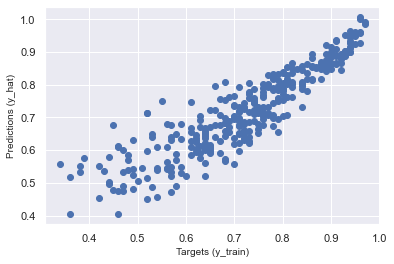

In [28]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=10)
plt.ylabel('Predictions (y_hat)',size=10)

plt.show()

# Utilize Residual Plot to Check Model

Text(0.5, 1.0, 'Residuals PDF')

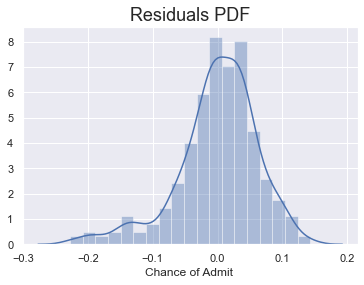

In [20]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [29]:
# Find the R-squared of the model
reg.score(x_train,y_train)

0.7989688563015723

In [32]:
r2 = reg.score(x_train,y_train)
n=x_train.shape[0]
p=x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7957677234401324

In [ ]:
# model explains 79% of the variability of the data

Determine Weights and Bias

In [22]:
# Obtain the bias (intercept) of the regression
reg.intercept_

0.7215825640580326

In [35]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([0.01691077, 0.02456457, 0.00937258, 0.00064187, 0.02186469,
       0.07367738, 0.01627939])

feature selection and summary table

In [30]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,GRE Score,0.022855
1,University Rating,0.004989
2,LOR,0.021023
3,CGPA,0.079277
4,Research,0.016377


# Testing

In [37]:
y_hat_test = reg.predict(x_test)

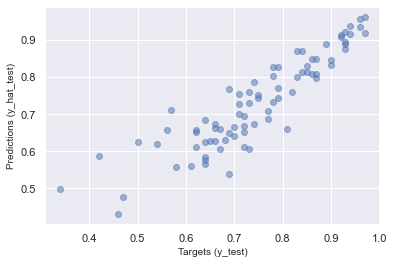

In [39]:
#scatter plot with test target and test predictions
plt.scatter(y_test, y_hat_test, alpha=0.5)
plt.xlabel('Targets (y_test)',size=10)
plt.ylabel('Predictions (y_hat_test)',size=10)

plt.show()

Revist Predictions

In [40]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,1.610947
1,1.866975
2,2.224703
3,2.102945
4,2.079552


In [41]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,1.610947,2.509290
1,1.866975,NaN
2,2.224703,NaN
3,2.102945,NaN
4,2.079552,NaN
...,...,...
75,1.963235,NaN
76,1.913813,NaN
77,1.985995,NaN
78,1.946331,NaN


In [42]:
y_test = y_test.reset_index(drop=True)

In [43]:
y_test.head()

0    0.47
1    0.50
2    0.83
3    0.79
4    0.78
Name: Chance of Admit , dtype: float64

In [44]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,1.610947,1.599994
1,1.866975,1.648721
2,2.224703,2.293319
3,2.102945,2.203396
4,2.079552,2.181472
...,...,...
75,1.963235,2.095936
76,1.913813,1.993716
77,1.985995,2.159766
78,1.946331,2.013753


In [52]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100) 
df_pf

,Prediction,Target,Residual,Difference,Difference%
0,1.610947,1.599994,-0.010953,0.684579,0.684579
1,1.866975,1.648721,-0.218254,13.237764,13.237764
2,2.224703,2.293319,0.068615,2.991971,2.991971
3,2.102945,2.203396,0.100451,4.558921,4.558921
4,2.079552,2.181472,0.101920,4.672089,4.672089
...,...,...,...,...,...
75,1.963235,2.095936,0.132701,6.331341,6.331341
76,1.913813,1.993716,0.079902,4.007708,4.007708
77,1.985995,2.159766,0.173772,8.045851,8.045851
78,1.946331,2.013753,0.067422,3.348077,3.348077


In [51]:
df_pf.describe()

,Prediction,Target,Residual,Difference
count,80.000000,80.000000,80.000000,80.000000
mean,2.094721,2.127131,0.032411,4.639180
std,0.260442,0.285018,0.114488,3.990407
min,1.537470,1.404948,-0.279253,0.060154
25%,1.895151,1.934792,-0.015424,1.900420
50%,2.074507,2.085508,0.042892,3.884325
75%,2.290779,2.345525,0.104810,5.896411
max,2.618970,2.637944,0.315108,18.348253
